# FastText Encoder

In this notebook, we will use the FastText encoder to encode the text data into a vector representation.
We consider FastText as a better alternative to the Word2Vec encoder as it can handle out of vocabulary words contrary to Word2Vec.

In [1]:
# import all libraries needed to use the FastTextEncoder
import numpy as np
import fasttext

# For heatmap visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ft = fasttext.load_model('models/cc.en.300.bin')

In [3]:
words = [
    "chair",
    "table",
    "couch",
    "bed",
    "desk",
    "lamp",
    "rug",
    "pillow",
    "tv",
    "picture",
    "window",
    "chandelier", # >1 token in BERT
    "painting",
    "carpet",
    "mug",
]

word_embeddings = [ft.get_word_vector(word) for word in words]

for word, emb in zip(words, word_embeddings):
    # All of them should be of size 300
    print(word, emb.shape)

chair (300,)
table (300,)
couch (300,)
bed (300,)
desk (300,)
lamp (300,)
rug (300,)
pillow (300,)
tv (300,)
picture (300,)
window (300,)
chandelier (300,)
painting (300,)
carpet (300,)
mug (300,)


### Similarity matrix

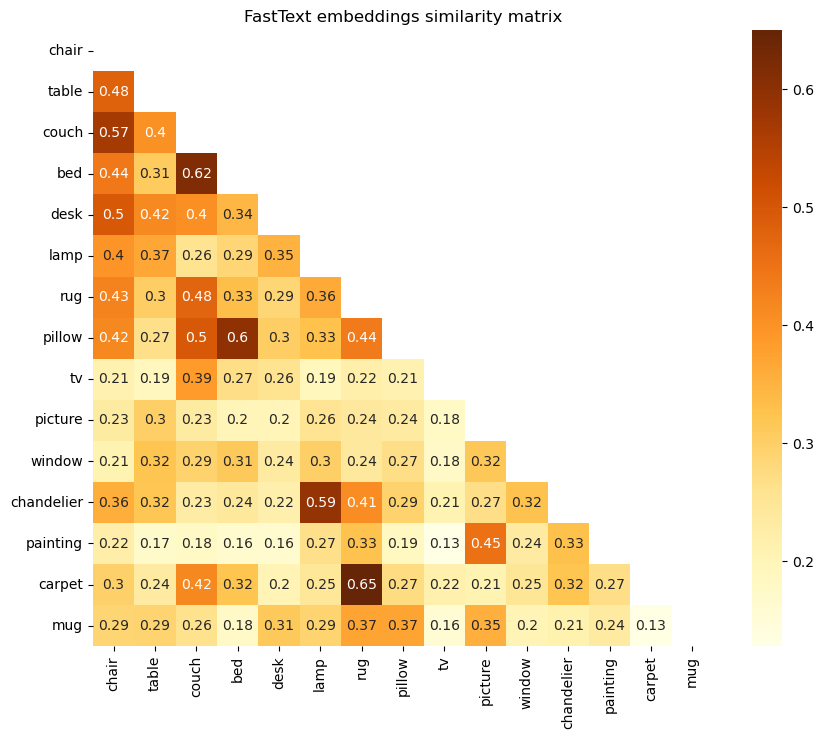

In [4]:
# Compute a similarity matrix between all words using **numpy** and print the similarity matrix as a heatmap
similarity_matrix = np.zeros((len(words), len(words)))

for i, embedding_i in enumerate(word_embeddings):
    for j, embedding_j in enumerate(word_embeddings):
        similarity_matrix[i, j] = np.dot(embedding_i, embedding_j) / (np.linalg.norm(embedding_i) * np.linalg.norm(embedding_j))

mask = np.zeros_like(similarity_matrix)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, xticklabels=words, yticklabels=words, cmap='YlOrBr', annot=True, mask=mask)
plt.title("FastText embeddings similarity matrix")
plt.show()

### Nearest neighbors using FastText

For each word, compute the 5 most similar words using **FastText** and print them in a table with similarity rounded to 3 decimal places

In [8]:
# Print a table of word <> #1 (similarity) <> ... <> #5 (similarity)
print(f"{'Word':<25} {'#1':<25} {'#2':<25} {'#3':<25} {'#4':<25} {'#5':<25}")
print(f"{'-'*25:<25} {'-'*25:<25} {'-'*25:<25} {'-'*25:<25} {'-'*25:<25} {'-'*25:<25}")

def print_most_similar(pred):
    prob, word = pred
    return f"{str(round(prob,2)) + ':' + word:<25}"

for i, word in enumerate(words):
    most_similar = ft.get_nearest_neighbors(word, k=5)
    print(f"{word:<25} {print_most_similar(most_similar[0])} {print_most_similar(most_similar[1])} {print_most_similar(most_similar[2])} {print_most_similar(most_similar[3])} {print_most_similar(most_similar[4])}")

Word                      #1                        #2                        #3                        #4                        #5                       
------------------------- ------------------------- ------------------------- ------------------------- ------------------------- -------------------------
chair                     0.79:chairs               0.74:chair.The            0.73:Chair                0.71:chair.               0.68:chair.This          
table                     0.81:tables               0.72:table.This           0.71:table.The            0.7:table.                0.7:table.But            
couch                     0.81:sofa                 0.75:couches              0.72:couch.I              0.71:couch.               0.71:couch-              
bed                       0.73:beds                 0.71:bed.The              0.71:bed-                 0.71:bed.                 0.69:bed.This            
desk                      0.74:desks                0.73:desk.  